# Topic Modeling on newsgroups

## Topic Modeling - Attempt #1 (All Text)

In [1]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups()

In [2]:
newsgroups.data

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [3]:
for i in range(10):
    print(newsgroups.data[i])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.wa

In [4]:
newsgroups.target

array([7, 4, 4, ..., 3, 1, 8])

In [5]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'),
                            categories=['rec.autos'],
                            #subset='test',
                            #shuffle=True,
                            #random_state=123
                               )

In [7]:
for i in range(10):
    print(newsgroups.data[i])

From article <1993Apr5.200048.23421@ucsu.Colorado.EDU>, by lorenzo@rintintin.Colorado.EDU (Eric Lorenzo):

--Let me put it like this.  The only similarity between the three models
  is the "300", or 3-liter engine displacement.  Actually, the SC300 (the
  coupe) and the GS300 (the funky-looking new sedan) share the same 3.0
  liter inline-six, and the ES300 (popular small sedan) uses 3.0 V6 shared
  with the Camry.  The SC300 is a luxury/sports coupe, the GS300 is the new
  luxury sedan, and the ES300 is the base executive sedan.  All three look
  completely different.

--Aamir Qazi
-- 

Perhaps it is because witnesses who have left the compound have all
testified that the BATF shot first, they they did not identify themselves
before tossing in concussion grenades (not that anyone inside could have
_heard_ such identification after being near a concussion grenade) and
the announcement from the BATF that they have sealed the warrant under
which they were operating - which was a _search_

# A random selection of topics

In [8]:
import pandas as pd
df_news = pd.read_csv("newsgroups1.csv") 
df_news.text=df_news.text.astype(str)

In [9]:
df_news

text  category
0     \n\nPeter> : > Does anyone have any  other sug...         0
1     \n\nI guess you need to be reminded of some th...         3
2     \n\n\n\nHey, joe -- assuming you're old enough...         3
3     To: turpin@cs.utexas.edu (Russell Turpin)\n\n ...         2
4     I like the Clark-WIlliams-Bonds order.\nPitche...         1
...                                                 ...       ...
1541  I sent a version of this post out a while ago,...         1
1542  Well, the question of why fire equipment took ...         3
1543  \nI've had neither a baby nor a kidney stone, ...         2
1544  \n\n\n\n\n\n\n\n\n\nFor one week, she probably...         2
1545  Few simple points:  Leadership: You are respon...         3

[1546 rows x 2 columns]

In [10]:
import nltk
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove email addresses
    text = re.sub('\S*\@\S*', '', text)    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove numbers
    text = re.sub('\d', '', text)    
    # Remove quotes
#    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

[nltk_data] Downloading package stopwords to /home/andrea/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
clean_text_1('<href image.jpeg>')

' href imagejpeg'

In [12]:
# Let's take a look at the updated text
df_news_clean = pd.DataFrame(df_news.text.apply(clean_text_1))

In [13]:
df_news_clean

text
0      peter anyone suggestions came peter yep heres...
1      guess need reminded things ever heard first a...
2      hey joe assuming youre old enough remember fe...
3      russell turpin rt administering treatment kno...
4      like clarkwilliamsbonds order pitchers walk c...
...                                                 ...
1541   sent version post ago swallowed void apologie...
1542   well question fire equipment took long reach ...
1543   ive neither baby kidney stone according aunt ...
1544   one week probably wants see react diet change...
1545   simple points leadership responsible subordin...

[1546 rows x 1 columns]

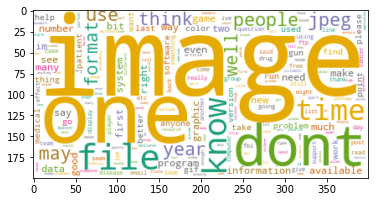

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud

alltext=''
for index,row in df_news_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


In [15]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

def lemmatize(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i in word_tokenize(text):
        if len(i) > 3:
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


def lemmatize_tag(text):
    wnl = WordNetLemmatizer()
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)


In [16]:
data_clean = pd.DataFrame(df_news_clean.text.apply(lemmatize))

In [17]:
data_clean=df_news_clean

In [18]:
data_clean

text
0      peter anyone suggestions came peter yep heres...
1      guess need reminded things ever heard first a...
2      hey joe assuming youre old enough remember fe...
3      russell turpin rt administering treatment kno...
4      like clarkwilliamsbonds order pitchers walk c...
...                                                 ...
1541   sent version post ago swallowed void apologie...
1542   well question fire equipment took long reach ...
1543   ive neither baby kidney stone according aunt ...
1544   one week probably wants see react diet change...
1545   simple points leadership responsible subordin...

[1546 rows x 1 columns]

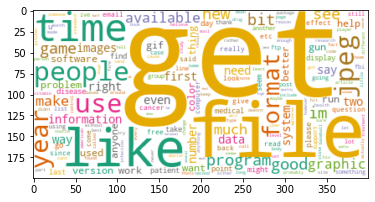

In [19]:
stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['image','know','well','also','dont','one','would','could','many','may','think'])

alltext=''
for index,row in data_clean.iterrows():
    alltext=alltext+row.text

wc = WordCloud(collocations=False,stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(alltext)
plt.imshow(wc, interpolation="bilinear")

plt.show()


## LSA



In [20]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2)
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaa  aaaaarrrrgh  aagain  aalong  aanerud  aaplay  aarnet  aaron  \
0      0    0            0       0       0        0       0       0      0   
1      0    0            0       0       0        0       0       0      0   
2      0    0            0       0       0        0       0       0      0   
3      0    0            0       0       0        0       0       0      0   
4      0    0            0       0       0        0       0       0      0   
...   ..  ...          ...     ...     ...      ...     ...     ...    ...   
1541   0    0            0       0       0        0       0       0      0   
1542   0    0            0       0       0        0       0       0      0   
1543   0    0            0       0       0        0       0       0      0   
1544   0    0            0       0       0        0       0       0      0   
1545   0    0            0       0       0        0       0       0      0   

      aatdb  ...  zphigs  zugcsmilumichedu  zupcic  zur  zurich  zvi  zyda  \
0         0  ...       0                 0       0    0       0    0     0   
1         0  ...       0                 0       0    0       0    0     0   
2         0  ...       0                 0       0    0       0    0     0   
3         0  ...       0                 0       0    0       0    0     0   
4         0  ...       0                 0       0    0       0    0     0   
...     ...  ...     ...               ...     ...  ...     ...  ...   ...   
1541      0  ...       0                 0       0    0       0    0     0   
1542      0  ...       0                 0       0    0       0    0     0   
1543      0  ...       0                 0       0    0       0    0     0   
1544      0  ...       0                 0       0    0       0    0     0   
1545      0  ...       0                 0       0    0       0    0     0   

      zygon  zyxel  zz  
0         0      0   0  
1         0      0   0  
2         0      0   0  
3         0      0   0  
4         0      0   0  
...     ...    ...  ..  
1541      0      0   0  
1542      0      0   0  
1543      0      0   0  
1544      0      0   0  
1545      0      0   0  

[1546 rows x 22099 columns]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = stopwords.words('english')
stop_words2=[]

for w in stop_words:
    stop_words2.append(w)

stop_words2.extend(['know','well','also','dont','one','would','could','many','may','think'])

stop_words2.extend(['please','thanks','anyone','someone','think','im','get','people','like','time','good','image','images','jpeg'])

vectorizer = TfidfVectorizer(stop_words=stop_words2,min_df=2)#, max_df=.98)
tfidf = vectorizer.fit_transform(data_clean.text)
len(vectorizer.get_feature_names())

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


9798

In [22]:
data_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
data_tfidf.index = data_clean.index
data_tfidf

aaa  aaplay  aaron  aawin   ab  abandon  abbott       abc  abdomen  \
0     0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
1     0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
2     0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
3     0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
4     0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
...   ...     ...    ...    ...  ...      ...     ...       ...      ...   
1541  0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
1542  0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.204596      0.0   
1543  0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
1544  0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   
1545  0.0     0.0    0.0    0.0  0.0      0.0     0.0  0.000000      0.0   

      abdominal  ...  zealots  zero  zinc  zip  zoloft  zone  zones  zoom  \
0      0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
1      0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
2      0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
3      0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
4      0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
...         ...  ...      ...   ...   ...  ...     ...   ...    ...   ...   
1541   0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
1542   0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
1543   0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
1544   0.083205  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   
1545   0.000000  ...      0.0   0.0   0.0  0.0     0.0   0.0    0.0   0.0   

      zooming  zyxel  
0         0.0    0.0  
1         0.0    0.0  
2         0.0    0.0  
3         0.0    0.0  
4         0.0    0.0  
...       ...    ...  
1541      0.0    0.0  
1542      0.0    0.0  
1543      0.0    0.0  
1544      0.0    0.0  
1545      0.0    0.0  

[1546 rows x 9798 columns]

In [23]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=8)

svd_model.fit(data_tfidf)

print(svd_model.components_.shape)
print(svd_model.singular_values_)


(8, 9798)
[6.08276253 4.66752424 3.15398345 2.80880291 2.49271898 2.29868685
 2.27973954 2.18975609]


In [24]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print("%.2f*%s "% (t[1], t[0]) ,end='')
    print("")

Topic 0: 
1.00*nan 0.00*leaf 0.00*list 0.00*game 0.00*bit 0.00*kirlian 0.00*go 
Topic 1: 
0.11*game 0.09*see 0.09*year 0.09*first 0.09*even 0.09*bit 0.09*much 
Topic 2: 
0.24*graphics 0.22*format 0.20*bit 0.19*file 0.19*files 0.17*gif 0.16*program 
Topic 3: 
0.24*fbi 0.20*fire 0.14*batf 0.12*gun 0.10*koresh 0.10*atf 0.09*government 
Topic 4: 
0.14*cancer 0.12*medical 0.12*chronic 0.12*information 0.11*disease 0.10*surgery 0.10*treatment 
Topic 5: 
0.35*graphics 0.29*computer 0.24*bit 0.19*manchester 0.10*centre 0.10*voice 0.10*computing 
Topic 6: 
0.31*list 0.18*mail 0.17*mailing 0.16*email 0.15*send 0.14*looking 0.14*address 
Topic 7: 
0.25*list 0.18*gun 0.15*post 0.13*mailing 0.12*right 0.11*bit 0.10*mail 


/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## LDA

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words2,min_df=2)#, max_df=.9)
data_cv = cv.fit_transform(data_clean.text)
data = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data.index = data_clean.index
data

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aaa  aaplay  aaron  aawin  ab  abandon  abbott  abc  abdomen  abdominal  \
0       0       0      0      0   0        0       0    0        0          0   
1       0       0      0      0   0        0       0    0        0          0   
2       0       0      0      0   0        0       0    0        0          0   
3       0       0      0      0   0        0       0    0        0          0   
4       0       0      0      0   0        0       0    0        0          0   
...   ...     ...    ...    ...  ..      ...     ...  ...      ...        ...   
1541    0       0      0      0   0        0       0    0        0          0   
1542    0       0      0      0   0        0       0    2        0          0   
1543    0       0      0      0   0        0       0    0        0          0   
1544    0       0      0      0   0        0       0    0        0          1   
1545    0       0      0      0   0        0       0    0        0          0   

      ...  zealots  zero  zinc  zip  zoloft  zone  zones  zoom  zooming  zyxel  
0     ...        0     0     0    0       0     0      0     0        0      0  
1     ...        0     0     0    0       0     0      0     0        0      0  
2     ...        0     0     0    0       0     0      0     0        0      0  
3     ...        0     0     0    0       0     0      0     0        0      0  
4     ...        0     0     0    0       0     0      0     0        0      0  
...   ...      ...   ...   ...  ...     ...   ...    ...   ...      ...    ...  
1541  ...        0     0     0    0       0     0      0     0        0      0  
1542  ...        0     0     0    0       0     0      0     0        0      0  
1543  ...        0     0     0    0       0     0      0     0        0      0  
1544  ...        0     0     0    0       0     0      0     0        0      0  
1545  ...        0     0     0    0       0     0      0     0        0      0  

[1546 rows x 9798 columns]

In [33]:
# Install the package in the current Jupyter kernel

import sys
!pip install gensim

In [34]:
from gensim import matutils, models
import scipy.sparse

In [35]:
tdm = data.transpose()
tdm.head()

0     1     2     3     4     5     6     7     8     9     ...  1536  \
aaa        0     0     0     0     0     0     0     0     0     0  ...     0   
aaplay     0     0     0     0     0     0     0     0     0     0  ...     0   
aaron      0     0     0     0     0     0     0     0     0     0  ...     0   
aawin      0     0     0     0     0     0     0     0     0     0  ...     0   
ab         0     0     0     0     0     0     0     0     0     0  ...     0   

        1537  1538  1539  1540  1541  1542  1543  1544  1545  
aaa        0     0     0     0     0     0     0     0     0  
aaplay     0     0     0     0     0     0     0     0     0  
aaron      0     0     0     0     0     0     0     0     0  
aawin      0     0     0     0     0     0     0     0     0  
ab         0     0     0     0     0     0     0     0     0  

[5 rows x 1546 columns]

In [36]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [37]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [38]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=8)
lda.print_topics()

[(0,
  '0.003*"game" + 0.003*"use" + 0.003*"graphics" + 0.003*"back" + 0.002*"medical" + 0.002*"information" + 0.002*"find" + 0.002*"even" + 0.002*"say" + 0.002*"said"'),
 (1,
  '0.004*"bit" + 0.003*"use" + 0.003*"format" + 0.003*"gif" + 0.003*"file" + 0.003*"much" + 0.002*"even" + 0.002*"information" + 0.002*"first" + 0.002*"program"'),
 (2,
  '0.004*"bit" + 0.004*"file" + 0.004*"use" + 0.003*"information" + 0.003*"data" + 0.003*"new" + 0.003*"want" + 0.003*"available" + 0.002*"problem" + 0.002*"make"'),
 (3,
  '0.003*"much" + 0.003*"see" + 0.003*"need" + 0.003*"year" + 0.003*"two" + 0.002*"use" + 0.002*"right" + 0.002*"way" + 0.002*"first" + 0.002*"graphics"'),
 (4,
  '0.003*"available" + 0.003*"file" + 0.003*"data" + 0.003*"two" + 0.003*"much" + 0.003*"new" + 0.003*"number" + 0.002*"see" + 0.002*"help" + 0.002*"format"'),
 (5,
  '0.003*"year" + 0.003*"use" + 0.003*"fbi" + 0.002*"see" + 0.002*"two" + 0.002*"much" + 0.002*"better" + 0.002*"number" + 0.002*"system" + 0.002*"phigs"'),
 

## Topic Modeling - Nouns Only

In [31]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [32]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(df_news_clean.text.apply(nouns))
data_nouns

text
0     peter anyone suggestions heres peter number te...
1     guess need things amendment guess isnt crime k...
2     hey joe youre remember responsibility time rea...
3     russell turpin rt treatment placebo test treat...
4     clarkwilliamsbonds order pitchers clark outs y...
...                                                 ...
1541  version post void apologies anyone wasnt opini...
1542  question fire equipment compound report tapes ...
1543             kidney stone plenty kidney stone worse
1544  week changes anything need calories medium app...
1545  points leadership subordinates law deaths resu...

[1546 rows x 1 columns]

In [48]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

add_stop_words = []
#add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
#                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words, min_df=2)#, min_df=.1, max_df=.9)
data_cvn = cvn.fit_transform(data_nouns.text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

aaplay  aaron  ab  abilities  ability  abortion  abs  absence  absolute  \
0          0      0   0          0        0         0    0        0         0   
1          0      0   0          0        0         0    0        0         0   
2          0      0   0          0        0         0    0        0         0   
3          0      0   0          0        0         0    0        0         0   
4          0      0   0          0        0         0    0        0         0   
...      ...    ...  ..        ...      ...       ...  ...      ...       ...   
1541       0      0   0          0        0         0    0        0         0   
1542       0      0   0          0        0         0    0        0         0   
1543       0      0   0          0        0         0    0        0         0   
1544       0      0   0          0        0         0    0        0         0   
1545       0      0   0          0        0         0    0        0         0   

      absorption  ...  zbuffer  zealand  zealot  zealots  zinc  zip  zone  \
0              0  ...        0        0       0        0     0    0     0   
1              0  ...        0        0       1        0     0    0     0   
2              0  ...        0        0       0        0     0    0     0   
3              0  ...        0        0       0        0     0    0     0   
4              0  ...        0        0       0        0     0    0     0   
...          ...  ...      ...      ...     ...      ...   ...  ...   ...   
1541           0  ...        0        0       0        0     0    0     0   
1542           0  ...        0        0       0        0     0    0     0   
1543           0  ...        0        0       0        0     0    0     0   
1544           0  ...        0        0       0        0     0    0     0   
1545           0  ...        0        0       0        0     0    0     0   

      zones  zoom  zyxel  
0         0     0      0  
1         0     0      0  
2         0     0      0  
3         0     0      0  
4         0     0      0  
...     ...   ...    ...  
1541      0     0      0  
1542      0     0      0  
1543      0     0      0  
1544      0     0      0  
1545      0     0      0  

[1546 rows x 5509 columns]

In [34]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [35]:
# Let's start with  topics
ldan = models.LdaModel(corpus=corpusn, num_topics=6, id2word=id2wordn,passes=20)
ldan.print_topics()

[(0,
  '0.011*"people" + 0.009*"time" + 0.007*"dont" + 0.007*"problem" + 0.007*"way" + 0.006*"vitamin" + 0.006*"team" + 0.005*"group" + 0.005*"im" + 0.005*"things"'),
 (1,
  '0.012*"people" + 0.009*"gun" + 0.009*"children" + 0.006*"disease" + 0.006*"government" + 0.006*"fbi" + 0.005*"guns" + 0.005*"gas" + 0.005*"agents" + 0.005*"health"'),
 (2,
  '0.019*"cancer" + 0.009*"drug" + 0.008*"health" + 0.008*"information" + 0.007*"people" + 0.007*"time" + 0.006*"number" + 0.006*"research" + 0.006*"drugs" + 0.005*"patients"'),
 (3,
  '0.029*"game" + 0.018*"games" + 0.015*"baseball" + 0.014*"time" + 0.010*"year" + 0.008*"players" + 0.008*"dont" + 0.007*"team" + 0.006*"league" + 0.006*"pitch"'),
 (4,
  '0.038*"image" + 0.021*"jpeg" + 0.016*"file" + 0.016*"images" + 0.012*"files" + 0.011*"version" + 0.011*"bit" + 0.011*"software" + 0.011*"program" + 0.011*"format"'),
 (5,
  '0.015*"graphics" + 0.011*"computer" + 0.009*"information" + 0.007*"mail" + 0.007*"year" + 0.006*"number" + 0.006*"people" +

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [36]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [37]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.text.apply(nouns_adj))
data_nouns_adj

text
0     peter anyone suggestions yep heres theory pete...
1     guess need things first amendment guess isnt c...
2     hey joe youre old enough remember presidential...
3     russell turpin rt treatment know rt receive pl...
4     clarkwilliamsbonds order pitchers clark outs l...
...                                                 ...
1541  sent version post void apologies anyone wasnt ...
1542  question fire equipment reach compound aired r...
1543  ive baby kidney stone aunt plenty kidney stone...
1544  week react diet changes anything live diet nee...
1545  simple points leadership responsible subordina...

[1546 rows x 1 columns]

In [38]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, min_df=2)
data_cvna = cvna.fit_transform(data_nouns_adj.text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aaa  aaplay  aaron  ab  abbott  abdominal  abilities  ability  abject  \
0       0       0      0   0       0          0          0        0       0   
1       0       0      0   0       0          0          0        0       0   
2       0       0      0   0       0          0          0        0       0   
3       0       0      0   0       0          0          0        0       0   
4       0       0      0   0       0          0          0        0       0   
...   ...     ...    ...  ..     ...        ...        ...      ...     ...   
1541    0       0      0   0       0          0          0        0       0   
1542    0       0      0   0       0          0          0        0       0   
1543    0       0      0   0       0          0          0        0       0   
1544    0       0      0   0       0          1          0        0       0   
1545    0       0      0   0       0          0          0        0       0   

      able  ...  zealand  zealot  zealots  zinc  zip  zoloft  zone  zones  \
0        0  ...        0       0        0     0    0       0     0      0   
1        0  ...        0       1        0     0    0       0     0      0   
2        0  ...        0       0        0     0    0       0     0      0   
3        0  ...        0       0        0     0    0       0     0      0   
4        0  ...        0       0        0     0    0       0     0      0   
...    ...  ...      ...     ...      ...   ...  ...     ...   ...    ...   
1541     0  ...        0       0        0     0    0       0     0      0   
1542     0  ...        0       0        0     0    0       0     0      0   
1543     0  ...        0       0        0     0    0       0     0      0   
1544     0  ...        0       0        0     0    0       0     0      0   
1545     0  ...        0       0        0     0    0       0     0      0   

      zoom  zyxel  
0        0      0  
1        0      0  
2        0      0  
3        0      0  
4        0      0  
...    ...    ...  
1541     0      0  
1542     0      0  
1543     0      0  
1544     0      0  
1545     0      0  

[1546 rows x 7369 columns]

In [39]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [40]:
ldan_2 = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=30)

ldan_2.print_topics()

[(0,
  '0.010*"people" + 0.009*"time" + 0.007*"fbi" + 0.006*"dont" + 0.005*"batf" + 0.005*"way" + 0.005*"government" + 0.005*"im" + 0.004*"evidence" + 0.004*"koresh"'),
 (1,
  '0.018*"game" + 0.012*"year" + 0.011*"games" + 0.010*"baseball" + 0.009*"time" + 0.009*"team" + 0.008*"players" + 0.008*"dont" + 0.007*"good" + 0.005*"player"'),
 (2,
  '0.015*"image" + 0.012*"graphics" + 0.009*"data" + 0.008*"available" + 0.007*"software" + 0.006*"computer" + 0.006*"ftp" + 0.005*"program" + 0.005*"information" + 0.005*"images"'),
 (3,
  '0.033*"jpeg" + 0.024*"image" + 0.018*"file" + 0.014*"gif" + 0.013*"images" + 0.011*"format" + 0.010*"bit" + 0.009*"files" + 0.009*"version" + 0.008*"color"'),
 (4,
  '0.011*"people" + 0.007*"dont" + 0.006*"cancer" + 0.006*"gun" + 0.005*"medical" + 0.005*"hiv" + 0.005*"aids" + 0.004*"person" + 0.004*"patients" + 0.004*"information"'),
 (5,
  '0.008*"disease" + 0.007*"medical" + 0.007*"health" + 0.006*"vitamin" + 0.005*"number" + 0.005*"infection" + 0.005*"clinica

## Identify Topics in Each Document

In [41]:
corpus_transformed = ldan[corpusn]


In [42]:
list(corpus_transformed)

[[(1, 0.95069194)],
 [(1, 0.423944), (2, 0.5480375)],
 [(0, 0.4779253),
  (1, 0.01058258),
  (2, 0.24546982),
  (3, 0.010495343),
  (4, 0.010450703),
  (5, 0.24507622)],
 [(0, 0.24224654),
  (1, 0.012866895),
  (2, 0.7060945),
  (3, 0.012833835),
  (4, 0.012843172),
  (5, 0.013115107)],
 [(0, 0.515952), (3, 0.46311957)],
 [(3, 0.96508855)],
 [(0, 0.014074631),
  (1, 0.7711153),
  (2, 0.0142109785),
  (3, 0.014022732),
  (4, 0.17264706),
  (5, 0.01392928)],
 [(0, 0.055906214),
  (1, 0.055571277),
  (2, 0.055674143),
  (3, 0.05564694),
  (4, 0.05567184),
  (5, 0.72152954)],
 [(0, 0.98385745)],
 [(0, 0.16666667),
  (1, 0.16666667),
  (2, 0.16666667),
  (3, 0.16666667),
  (4, 0.16666667),
  (5, 0.16666667)],
 [(0, 0.16890079), (5, 0.8018192)],
 [(1, 0.55280316), (2, 0.10487063), (3, 0.17560798), (5, 0.16155054)],
 [(1, 0.46841514), (2, 0.5023032)],
 [(1, 0.46416128), (3, 0.5186624)],
 [(0, 0.011946226),
  (1, 0.011937873),
  (2, 0.011933832),
  (3, 0.011985885),
  (4, 0.94027495),
  (5, 0.

In [43]:
topic_prediction=[]
for j in list(corpus_transformed):
    main_topic=j[0][0]
    weigth=j[0][1]
    for t,w in j:
        if w > weigth :
            main_topic=t
            weigth=w
    topic_prediction.append(main_topic)


In [44]:
topic_prediction

[1,
 2,
 0,
 2,
 0,
 3,
 1,
 5,
 0,
 0,
 5,
 1,
 2,
 3,
 4,
 5,
 4,
 1,
 5,
 0,
 5,
 2,
 5,
 0,
 0,
 3,
 3,
 2,
 0,
 3,
 0,
 5,
 0,
 3,
 2,
 3,
 4,
 1,
 1,
 1,
 5,
 2,
 3,
 3,
 0,
 1,
 2,
 0,
 5,
 1,
 3,
 5,
 2,
 4,
 4,
 0,
 2,
 5,
 0,
 5,
 1,
 5,
 3,
 5,
 5,
 1,
 0,
 0,
 3,
 1,
 0,
 5,
 3,
 3,
 5,
 5,
 3,
 5,
 4,
 5,
 5,
 5,
 2,
 2,
 0,
 1,
 5,
 2,
 0,
 1,
 2,
 5,
 3,
 1,
 0,
 0,
 1,
 5,
 0,
 4,
 1,
 5,
 0,
 4,
 1,
 4,
 1,
 3,
 3,
 0,
 3,
 1,
 5,
 2,
 5,
 3,
 0,
 1,
 2,
 0,
 3,
 4,
 3,
 1,
 0,
 2,
 1,
 5,
 3,
 0,
 5,
 1,
 1,
 4,
 0,
 1,
 0,
 0,
 3,
 1,
 4,
 1,
 0,
 1,
 1,
 0,
 1,
 5,
 1,
 3,
 3,
 5,
 1,
 5,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 5,
 3,
 1,
 3,
 3,
 4,
 3,
 0,
 1,
 4,
 3,
 0,
 4,
 5,
 0,
 5,
 1,
 5,
 0,
 1,
 3,
 2,
 0,
 0,
 1,
 4,
 1,
 0,
 3,
 0,
 3,
 0,
 2,
 0,
 3,
 1,
 2,
 2,
 4,
 5,
 0,
 3,
 4,
 1,
 5,
 0,
 2,
 1,
 3,
 2,
 2,
 4,
 0,
 4,
 1,
 2,
 2,
 5,
 1,
 5,
 1,
 5,
 2,
 3,
 0,
 4,
 1,
 4,
 4,
 1,
 0,
 1,
 4,
 2,
 0,
 2,
 1,
 1,
 0,
 3,
 2,
 1,
 3,
 3,
 0,


In [45]:
df_news.category

0       0
1       3
2       3
3       2
4       1
       ..
1541    1
1542    3
1543    2
1544    2
1545    3
Name: category, Length: 1546, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_news.category,topic_prediction)

array([[ 31,   4,  13,  10, 174, 157],
       [ 81,  26,  20, 197,  10,  63],
       [171,  54,  74,  44,   6,  47],
       [ 74, 166,  57,  27,   7,  33],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

In [47]:
cat=['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.guns']